# Boston 집값 예측 _ 회귀

In [2]:
import pandas as pd
boston = pd.read_csv('./house_price.csv')
boston.head() 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CAT.MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,1


In [3]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CRIM      506 non-null    float64
 1   ZN        506 non-null    float64
 2   INDUS     506 non-null    float64
 3   CHAS      506 non-null    int64  
 4   NOX       506 non-null    float64
 5   RM        506 non-null    float64
 6   AGE       506 non-null    float64
 7   DIS       506 non-null    float64
 8   RAD       506 non-null    int64  
 9   TAX       506 non-null    int64  
 10  PTRATIO   506 non-null    float64
 11  B         506 non-null    float64
 12  LSTAT     506 non-null    float64
 13  MEDV      506 non-null    float64
 14  CAT.MEDV  506 non-null    int64  
dtypes: float64(11), int64(4)
memory usage: 59.4 KB


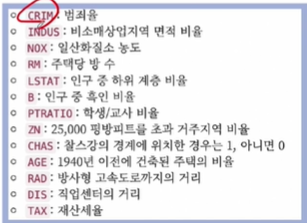 

In [4]:
boston['PRICE'] = boston['MEDV'] 

In [5]:
boston.drop(['MEDV'],axis=1,inplace=True)

In [12]:
boston.drop(['CAT.MEDV'],axis=1,inplace=True)

In [13]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


Price에 대한 histogram

In [14]:
import plotly.express as px 

fig = px.histogram(boston, x=boston.PRICE)
fig.show()


대체로 정규분포를 따르는 것처럼 보이는데 일부 큰 값들이 있다.

상관계수 확인

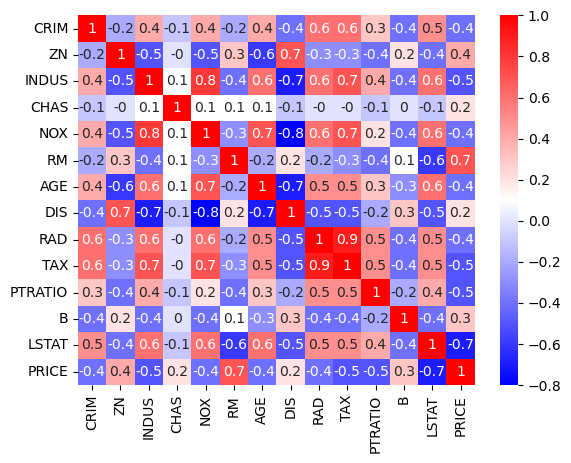

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

corr_mat = boston.corr().round(1)

sns.heatmap(data=corr_mat,annot=True,cmap='bwr');

Price와 방개수(RM), 저소득층 인구(LATAT)와 높은 상관관계 보임

이 관계에 대해서 좀 더 관찰

<Axes: xlabel='LSTAT', ylabel='PRICE'>

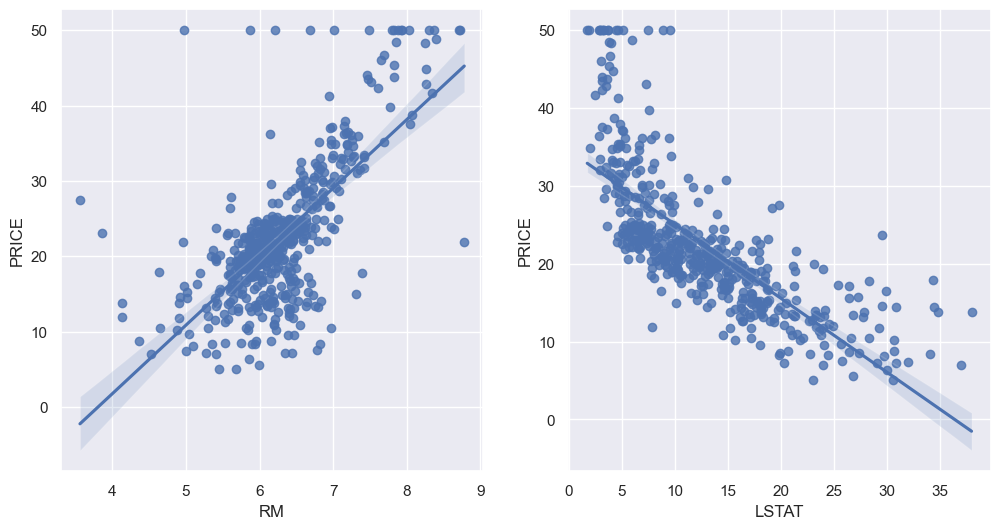

In [17]:
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize' : (12,6)})

fig, ax = plt.subplots(ncols=2)
sns.regplot(x='RM', y='PRICE', data=boston, ax=ax[0])
sns.regplot(x='LSTAT', y='PRICE', data=boston, ax=ax[1])

- 가설 : 저소득층 인구가 많을수록 집값이 낮아지고, 방의 개수가 많을수록 집값이 높아진다

과연 정말일까?

실제로는 '과연 이 특성이 집값예측에 필요한 특성일까?' 를 고민해야됌

In [18]:
from sklearn.model_selection import train_test_split

X = boston.drop('PRICE' , axis=1)
y = boston.PRICE

x_train,x_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=13)


In [19]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

모델평가는 MSE로 

In [20]:
import numpy as np
from sklearn.metrics import mean_squared_error

pred_tr = reg.predict(x_train)
pred_test = reg.predict(x_test)

rmse_tr = np.sqrt(mean_squared_error(y_train,pred_tr))
rmse_test = np.sqrt(mean_squared_error(y_test,pred_test))


In [21]:
print('RMSE train:',rmse_tr)
print('RMSE test:',rmse_test)

RMSE train: 4.642806069019824
RMSE test: 4.931352584146716


성능 확인

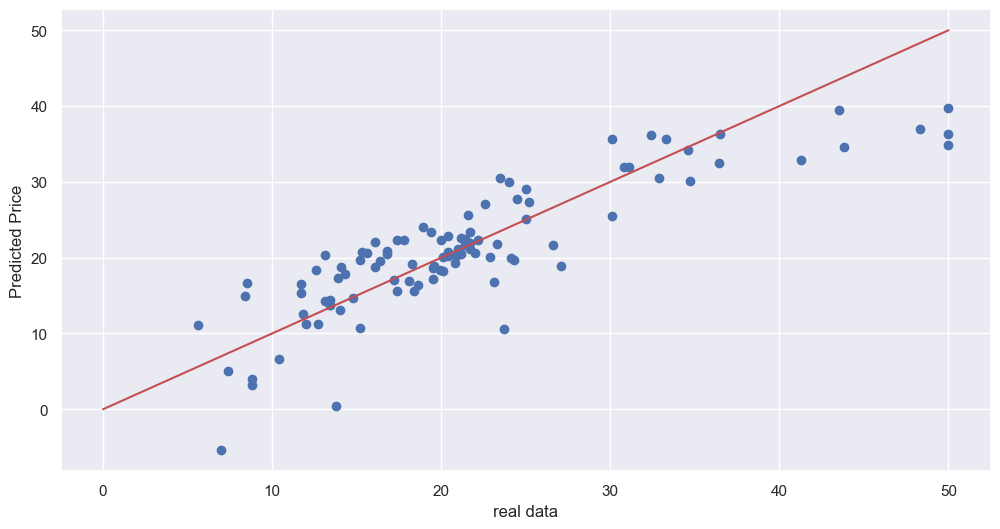

In [22]:
plt.scatter(y_test,pred_test)
plt.xlabel('real data')
plt.ylabel('Predicted Price')
plt.plot([0,50],[0,50],'r')
plt.show()

실제 집값이 40~50 구간에 있는 데이터를 모델이 30~40구간으로 예측을 잘 못했다.

그런데, LSTAT를 사용하는 것이 맞는 걸까?
한번 빼고 테스트 해보자

In [23]:
X = boston.drop(['PRICE','LSTAT'] , axis=1)
y = boston.PRICE

x_train,x_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=13)

In [24]:
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [25]:
pred_tr = reg.predict(x_train)
pred_test = reg.predict(x_test)

rmse_tr = np.sqrt(mean_squared_error(y_train,pred_tr))
rmse_test = np.sqrt(mean_squared_error(y_test,pred_test))

In [26]:
print('RMSE train:',rmse_tr)
print('RMSE test:',rmse_test)

RMSE train: 5.165137874244864
RMSE test: 5.2955950325971655


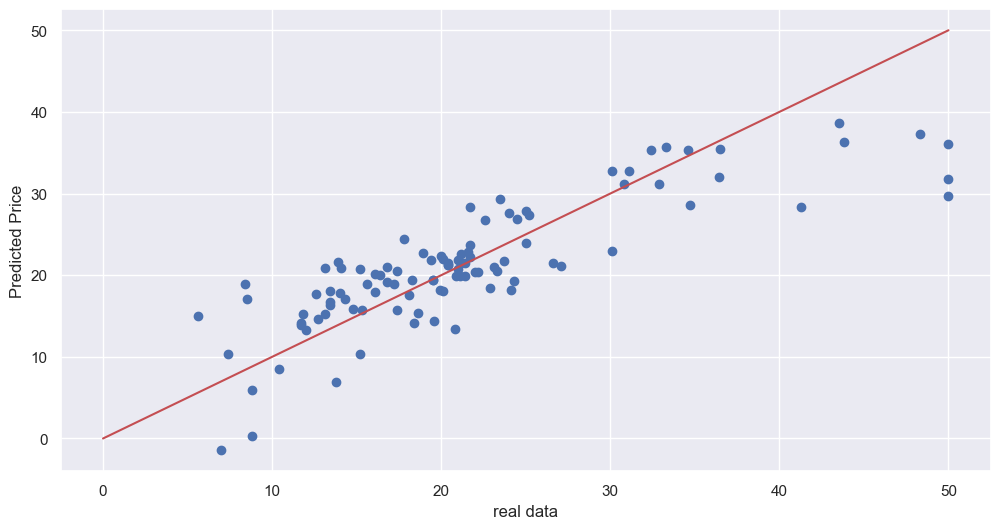

In [27]:
plt.scatter(y_test,pred_test)
plt.xlabel('real data')
plt.ylabel('Predicted Price')
plt.plot([0,50],[0,50],'r')
plt.show()